In [1]:
import pandas as pd

from pypeims.instruments.utils import pad_district_number

# Dataframe with TEA CCMR completers and concentrators data
ccmr_data = "District 2021-22_dist_5s4_final.csv"

ccmr = pd.read_csv(ccmr_data)

ccmr["DISTRICT"] = ccmr["DISTRICT"].apply(pad_district_number)

ccmr = ccmr.rename(columns={"DISTRICT": "District Number"})

# print(ccmr.head())

# Dataframe with TEA AskTED directory data
askted = pd.read_csv("AskTEDDirectory_8.8.23.csv")

# print(askted.head())

# print(list(askted.columns))

# Combining dataframes

merged_df = ccmr.merge(askted, how="left", on="District Number")

# print(merged_df.head())


In [2]:
merged_df = merged_df[['District Number', 'District Name', 'District Type', 'PGM_OF_STUDY CODE', 'PGM_OF_STUDY EXPLANATION', 'concentrator_only', 'completer_only', 'District Enrollment as of Oct 2022']]

In [3]:
merged_df.to_excel('CCMR_Analysis_8.8.23.xlsx', index=False)

In [4]:
print(list(merged_df.columns))

['District Number', 'District Name', 'District Type', 'PGM_OF_STUDY CODE', 'PGM_OF_STUDY EXPLANATION', 'concentrator_only', 'completer_only', 'District Enrollment as of Oct 2022']


In [5]:

# Modify or create the 'District Type Processed' column based on 'District Type'
merged_df['District Type'] = merged_df['District Type'].apply(lambda x: 'PUBLIC' if x != 'CHARTER' else 'CHARTER')

In [6]:
print(list(merged_df.columns))

['District Number', 'District Name', 'District Type', 'PGM_OF_STUDY CODE', 'PGM_OF_STUDY EXPLANATION', 'concentrator_only', 'completer_only', 'District Enrollment as of Oct 2022']


In [7]:
print(list(merged_df["PGM_OF_STUDY EXPLANATION"].unique()))

['ACCOUNTING AND FINANCIAL SERVICES', 'AGRIBUSINESS', 'ANIMAL SCIENCE', 'APPLIED AGRICULTURAL ENGINEERING', 'BUSINESS MANAGEMENT', 'CYBERSECURITY', 'DIGITAL COMMUNICATIONS', 'EARLY LEARNING', 'EMERGENCY SERVICES', 'ENTREPRENEURSHIP', 'ENVIRONMENTAL AND NATURAL RESOURCES', 'FAMILY AND COMMUNITY SERVICES', 'FOOD AND SCIENCE TECHNOLOGY', 'HEALTH AND WELLNESS', 'HEALTH INFORMATICS', 'HEALTHCARE DIAGNOSTICS', 'HEALTHCARE THERAPEUTIC', 'NURSING SCIENCE', 'PLANT SCIENCE', 'PROGRAMMING AND SOFTWARE DEVELOPMENT', 'TEACHING AND TRAINING', 'WEB DEVELOPMENT', 'MEDICAL THERAPY', 'ADVANCED MANUFACTURING AND MACHINERY MECHANICS', 'CARPENTRY', 'ELECTRICAL', 'EXERCISE SCIENCE AND WELLNESS', 'GRAPHIC DESIGN AND MULTIMEDIA ARTS', 'HVAC AND SHEET METAL', 'LAW ENFORCEMENT', 'LEGAL STUDIES', 'MARKETING AND SALES', 'MASONRY', 'NETWORKING SYSTEMS', 'PLUMBING AND PIPEFITTING', 'CONSTRUCTION MANAGEMENT AND INSPECTION', 'WELDING', 'INDUSTRIAL MAINTENANCE', 'LODGING AND RESORT MANAGEMENT', 'TRAVEL, TOURISM, AND A

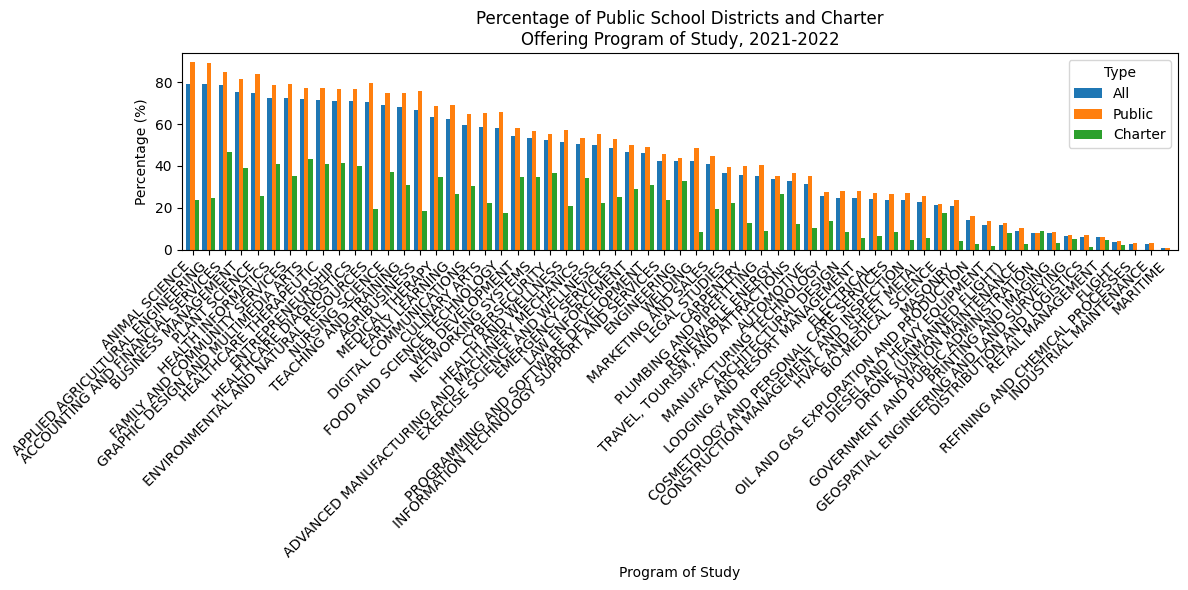

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

# Determine the total number of districts for each category from the `askted` dataframe
total_all = askted['District Number'].nunique()
total_public = askted[askted["District Type"] != "CHARTER"]['District Number'].nunique()
total_charter = askted[askted["District Type"] == "CHARTER"]['District Number'].nunique()

# Creating separate DataFrames for "PUBLIC" and "CHARTER" values and for "All"
public_counts = merged_df[merged_df["District Type"] != "CHARTER"]["PGM_OF_STUDY EXPLANATION"].value_counts() / total_public * 100
charter_counts = merged_df[merged_df["District Type"] == "CHARTER"]["PGM_OF_STUDY EXPLANATION"].value_counts() / total_charter * 100
all_counts = merged_df["PGM_OF_STUDY EXPLANATION"].value_counts() / total_all * 100

# Convert value counts to dataframes
df_public = public_counts.reset_index()
df_public.columns = ['Program of Study', 'Public']

df_charter = charter_counts.reset_index()
df_charter.columns = ['Program of Study', 'Charter']

df_all = all_counts.reset_index()
df_all.columns = ['Program of Study', 'All']

# Merge the dataframes on "Program of Study" ensuring all programs are accounted for
merged_counts = df_all.merge(df_public, on="Program of Study", how="outer").merge(df_charter, on="Program of Study", how="outer").fillna(0)

# Set index for plotting
merged_counts.set_index("Program of Study", inplace=True)

# Plotting
merged_counts.plot(kind='bar', figsize=(12, 6), width=0.8)

plt.xticks(rotation=45, ha='right')
plt.ylabel('Percentage (%)')
plt.title('Percentage of Public School Districts and Charter\nOffering Program of Study, 2021-2022')
plt.tight_layout()
plt.legend(title="Type")

# Save the figure to a PNG file
plt.savefig('Triple_Bar_Chart_Percentage.png', dpi=300)
plt.show()

# Exporting overall value counts to Excel
value_counts_df = all_counts.reset_index()
value_counts_df.columns = ['Value', 'Count']
value_counts_df['Percent'] = (value_counts_df['Count'] / askted['District Number'].nunique()) * 100

value_counts_df.to_excel('CCMR Program of Study_ALL_value counts.xlsx', index=False)

# Creating separate DataFrames for "PUBLIC" and "CHARTER" values
public_df = merged_df[merged_df["District Type"] != "CHARTER" ]
charter_df = merged_df[merged_df["District Type"] == "CHARTER"]

# Getting value counts for these separate DataFrames
public_value_counts = public_df["PGM_OF_STUDY EXPLANATION"].value_counts().reset_index()
charter_value_counts = charter_df["PGM_OF_STUDY EXPLANATION"].value_counts().reset_index()

# Correcting the column names
public_value_counts.columns = ['Value', 'Count']
charter_value_counts.columns = ['Value', 'Count']

public_df_askted = askted[askted["District Type"] != "CHARTER"]
charter_df_askted = askted[askted["District Type"] == "CHARTER"]

# Calculate percentages based on unique district numbers
public_value_counts['Percent'] = (public_value_counts['Count'] / public_df_askted['District Number'].nunique()) * 100
charter_value_counts['Percent'] = (charter_value_counts['Count'] / charter_df_askted['District Number'].nunique()) * 100

# Exporting these value counts to their own Excel files
public_value_counts.to_excel('CCMR Program of Study_PUBLIC_value counts.xlsx', index=False)
charter_value_counts.to_excel('CCMR Program of Study_CHARTER_value counts.xlsx', index=False)


# Resetting index for exporting to Excel
export_df = merged_counts.reset_index()

# Exporting the data to Excel
export_df.to_excel('Triple_Bar_Chart_Data.xlsx', index=False)



In [9]:
# For the entire dataset
all_unique_program_counts = merged_df.groupby(['District Number', 'District Name'])['PGM_OF_STUDY EXPLANATION'].nunique().reset_index()
all_unique_program_counts.columns = ['District Number', 'District Name', 'Unique Program Count']
all_unique_program_counts = all_unique_program_counts.sort_values(by='District Name')

# For "PUBLIC" subset
public_df = merged_df[merged_df["District Type"] == "PUBLIC"]
public_unique_program_counts = public_df.groupby(['District Number', 'District Name'])['PGM_OF_STUDY EXPLANATION'].nunique().reset_index()
public_unique_program_counts.columns = ['District Number', 'District Name', 'Unique Program Count']
public_unique_program_counts = public_unique_program_counts.sort_values(by='District Name')

# For "CHARTER" subset
charter_df = merged_df[merged_df["District Type"] == "CHARTER"]
charter_unique_program_counts = charter_df.groupby(['District Number', 'District Name'])['PGM_OF_STUDY EXPLANATION'].nunique().reset_index()
charter_unique_program_counts.columns = ['District Number', 'District Name', 'Unique Program Count']
charter_unique_program_counts = charter_unique_program_counts.sort_values(by='District Name')

# Export to Excel with separate sheets
with pd.ExcelWriter('sorted_unique_program_counts_with_name.xlsx') as writer:
    all_unique_program_counts.to_excel(writer, sheet_name='All', index=False)
    public_unique_program_counts.to_excel(writer, sheet_name='Public', index=False)
    charter_unique_program_counts.to_excel(writer, sheet_name='Charters', index=False)

In [10]:
# Calculate average value counts
all_avg = all_unique_program_counts['Unique Program Count'].mean()
public_avg = public_unique_program_counts['Unique Program Count'].mean()
charter_avg = charter_unique_program_counts['Unique Program Count'].mean()

# Create a DataFrame to hold the results
avg_df = pd.DataFrame({
    'Category': ['All', 'Public', 'Charter'],
    'Average Unique Program Count': [all_avg, public_avg, charter_avg]
})

avg_df


,Category,Average Unique Program Count
0,All,28.170018
1,Public,29.052953
2,Charter,20.428571
